<a href="https://colab.research.google.com/github/icecore013/image-segmentation-keras/blob/master/PSPNet_unaugmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import
import os
from os import path as op
import numpy as np
!pip install rasterio
import rasterio
import tensorflow as tf
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
!pip install keras
%matplotlib inline
import random

     |████████████████████████████████| 19.3 MB 13.7 MB/s 


In [ ]:
# Loading of our drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'

Mounted at /content/gdrive


In [ ]:
# Config variables
IMAGE_SIZE = 256
SENTINEL_FOLDER = '/content/gdrive/MyDrive/Data/Training_data/Final_patches/patchified_images'
LABEL_FOLDER = '/content/gdrive/MyDrive/Data/Training_data/Final_patches/patchified_masks'

#SENTINEL_FOLDER = "/content/gdrive/MyDrive/Fires/PERIMETRES/PERIM_DATABASE/CAL_database/sentinel_tif_files"
#LABEL_FOLDER = "/content/gdrive/MyDrive/Fires/PERIMETRES/PERIM_DATABASE/CAL_database/label_tif_files"

PREDICTION_THRESHOLD = 0.4

In [ ]:
# Preparation of the train dataset

# Listing all filenames containing "post"
total_Flist = sorted(os.listdir(SENTINEL_FOLDER))

# Initialisation of the image dataset
image_dataset = []

for i, filename in enumerate(total_Flist):

  # Lecture du fichier tiff et conversion en Array
  with rasterio.open(op.join(SENTINEL_FOLDER, filename), 'r') as ds:
    arr = ds.read()

  # Normalize the data (divide par 10000)
  arr = arr / 10000

  # Change dimension order (number of channel at the end)
  arr = np.moveaxis(arr, 0, -1)

  # Check the dimensions of the Array
  print(arr.shape, i, filename)

  # Conversion Array en Tensor
  tf_image = tf.convert_to_tensor(arr, dtype = tf.float32)

  # Resize the image
  tf_image_resized = tf.image.resize(tf_image, size=(IMAGE_SIZE, IMAGE_SIZE))

  # Ajout du Train Dataset
  image_dataset.append(tf_image_resized)

image_dataset = np.array(image_dataset)

(1433, 761, 5) 0 CAL_database_Sentinel2_120_postFire_RGBIR.tif
(902, 1132, 5) 1 CAL_database_Sentinel2_140_postFire_RGBIR.tif
(1297, 1195, 5) 2 CAL_database_Sentinel2_164_postFire_RGBIR.tif
(4379, 3718, 5) 3 CAL_database_Sentinel2_176_postFire_RGBIR.tif
(674, 959, 5) 4 CAL_database_Sentinel2_185_postFire_RGBIR.tif
(1771, 1682, 5) 5 CAL_database_Sentinel2_201_postFire_RGBIR.tif
(996, 1029, 5) 6 CAL_database_Sentinel2_225_postFire_RGBIR.tif
(3631, 2658, 5) 7 CAL_database_Sentinel2_226_postFire_RGBIR.tif
(1347, 995, 5) 8 CAL_database_Sentinel2_227_postFire_RGBIR.tif
(980, 968, 5) 9 CAL_database_Sentinel2_238_postFire_RGBIR.tif
(783, 1042, 5) 10 CAL_database_Sentinel2_239_postFire_RGBIR(1).tif
(1514, 1954, 5) 11 CAL_database_Sentinel2_240_postFire_RGBIR.tif
(3062, 3268, 5) 12 CAL_database_Sentinel2_243_postFire_RGBIR.tif
(1687, 2661, 5) 13 CAL_database_Sentinel2_244_postFire_RGBIR.tif
(3650, 2672, 5) 14 CAL_database_Sentinel2_248_postFire_RGBIR.tif
(2091, 2007, 5) 15 CAL_database_Sentinel2

In [ ]:
# Preparation of the mask dataset

# Listing all mask filenames
mask_Flist = sorted(os.listdir(LABEL_FOLDER))

# Initialisation of the mask dataset
mask_dataset = []

for i, filename in enumerate(mask_Flist):

  # tif file opening and conversion in Array
  with rasterio.open(op.join(LABEL_FOLDER, filename), 'r') as ds:
    arr = ds.read()

  # Normalize the data (divide par 255)
  arr = arr / 255

  # Change dimension order (number of channel at the end)
  arr = np.moveaxis(arr, 0, -1)

  # Check the dimensions of the Array
  print(arr.shape, i, filename)

  # Conversion Array en Tensor
  tf_label = tf.convert_to_tensor(arr, dtype = tf.int32)

  # Resize the image
  tf_label_resized = tf.image.resize(tf_label, size=(IMAGE_SIZE, IMAGE_SIZE))

  # Ajout du Train Dataset
  mask_dataset.append(tf_label_resized.numpy())

mask_dataset = np.array(mask_dataset)

(1433, 761, 1) 0 CAL_database_Sentinel2_120_postFire_label.tif
(902, 1132, 1) 1 CAL_database_Sentinel2_140_postFire_label.tif
(1297, 1195, 1) 2 CAL_database_Sentinel2_164_postFire_label.tif
(4379, 3718, 1) 3 CAL_database_Sentinel2_176_postFire_label.tif
(674, 959, 1) 4 CAL_database_Sentinel2_185_postFire_label.tif
(1771, 1682, 1) 5 CAL_database_Sentinel2_201_postFire_label.tif
(996, 1029, 1) 6 CAL_database_Sentinel2_225_postFire_label.tif
(3631, 2658, 1) 7 CAL_database_Sentinel2_226_postFire_label.tif
(1347, 995, 1) 8 CAL_database_Sentinel2_227_postFire_label.tif
(980, 968, 1) 9 CAL_database_Sentinel2_238_postFire_label.tif
(783, 1042, 1) 10 CAL_database_Sentinel2_239_postFire_label.tif
(1514, 1954, 1) 11 CAL_database_Sentinel2_240_postFire_label.tif
(3062, 3268, 1) 12 CAL_database_Sentinel2_243_postFire_label.tif
(1687, 2661, 1) 13 CAL_database_Sentinel2_244_postFire_label.tif
(3650, 2672, 1) 14 CAL_database_Sentinel2_248_postFire_label.tif
(2091, 2007, 1) 15 CAL_database_Sentinel2_26

In [ ]:
# Checking the shape of X and y
print(mask_dataset.shape)
print(image_dataset.shape)

(30, 256, 256, 1)
(30, 256, 256, 5)


In [ ]:
def visual_check(image, label):

    # Selection of the first 3 channels
    image_rgb = image[:, :, :3]

    # Reorder for RGB image:
    #   Channels from GEE are: 2(B), 3(G), 4(R)
    #   Expected channels for RGB image: 4(R), 3(G), 2(B)
    image_rgb = image_rgb[:, :, ::-1] * 5

    # Finding the mask in mask_dataset    
    label_2D = label[:, :, 0]

    # Display graphs
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb, vmin=0)
    plt.title("Sentinel 2 RGB image")

    plt.subplot(1, 2, 2)
    plt.imshow(label_2D, cmap='gray', vmin=0, vmax=1)
    plt.title(("Label image"))

    plt.show()

# Checking some images

#for i in range(0, len(image_dataset)):
for i in range(0, 30):
    print(i, total_Flist[i])
    image = image_dataset[i]
    label = mask_dataset[i]
    visual_check(image, label)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_dataset, 
                                                    mask_dataset, 
                                                    test_size = 0.20)

In [ ]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator

batch_size = 10
seed = 42

data_gen_args = dict(width_shift_range = 0.1,
                     height_shift_range = 0.1,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True,
                     vertical_flip = True,
                     fill_mode = 'nearest')

X_datagen = ImageDataGenerator(**data_gen_args)
Y_datagen = ImageDataGenerator(**data_gen_args)
X_datagen.fit(X_train, augment=True, seed=seed)
Y_datagen.fit(y_train, augment=True, seed=seed)
X_train_augmented = X_datagen.flow(X_train, batch_size=batch_size, shuffle=True, seed=seed)
Y_train_augmented = Y_datagen.flow(y_train, batch_size=batch_size, shuffle=True, seed=seed)

# Test data, no data augmentation, but we create a generator anyway
X_datagen_val = ImageDataGenerator()
Y_datagen_val = ImageDataGenerator()
X_datagen_val.fit(X_test, augment=True, seed=seed)
Y_datagen_val.fit(y_test, augment=True, seed=seed)
X_test_augmented = X_datagen_val.flow(X_test, batch_size=batch_size, shuffle=True, seed=seed)
Y_test_augmented = Y_datagen_val.flow(y_test, batch_size=batch_size, shuffle=True, seed=seed)

# combine generators into one which yields image and masks
train_generator = zip(X_train_augmented, Y_train_augmented)
test_generator = zip(X_test_augmented, Y_test_augmented)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (24, 256, 256, 5) (5 channels).
  ' channels).')
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (24, 256, 256, 5) (5 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected eithe

In [ ]:
# Visual check of the data augmentation
num_batch = 0
for i, batch in enumerate(train_generator):

    for j in range(0, batch_size):
      visual_check(batch[0][j], batch[1][j])
    
    if(i >= num_batch):
        break

In [ ]:
from tensorflow import keras

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda


In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda, AveragePooling2D, Concatenate
from tensorflow.keras.optimizers import Adam

# Custom IoU metric
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def iou_metric(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return intersection / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection)

# Custom loss function
def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def bce_dice_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * (1 - dice_coef(y_true, y_pred))


strategy = tf.distribute.MirroredStrategy()

with strategy.scope():

  def resnet(x, input_shape):
      
      # Decreases the dimensions of the input image by a factor of 32
      x = ResNet50(include_top=False, weights=None,input_tensor=x ,input_shape=(256,256,5)).output

      # Upsampling by 4 so that we get an output feature map of size 1/8th of the initial image
      x = UpSampling2D(size = (4,4))(x)      
      
      return x
 
  def pyramid_pooling_module(x):  
 
    layer1 = AveragePooling2D(pool_size=(1,1))(x)
    layer1 = Conv2D(filters=64,kernel_size=(1,1))(layer1)
    layer1 = BatchNormalization()(layer1)
    layer1 = UpSampling2D(size=1,interpolation='bilinear',name='red_layer')(layer1)
    
    layer2 = AveragePooling2D(pool_size=(2,2))(x)
    layer2 = Conv2D(filters=64,kernel_size=(1,1))(layer2)
    layer2 = BatchNormalization()(layer2)
    layer2 = UpSampling2D(size=2,interpolation='bilinear',name='orange_layer')(layer2)
  
    layer3 = AveragePooling2D(pool_size=(4,4))(x)
    layer3 = Conv2D(filters=64,kernel_size=(1,1))(layer3)
    layer3 = BatchNormalization()(layer3)
    layer3 = UpSampling2D(size=4,interpolation='bilinear',name='blue_layer')(layer3)
  
    layer4 = AveragePooling2D(pool_size=(8,8))(x)
    layer4 = Conv2D(filters=64,kernel_size=(1,1))(layer4)
    layer4 = BatchNormalization()(layer4)
    layer4 = UpSampling2D(size=8,interpolation='bilinear',name='green_layer')(layer4)
  
    concatenated = Concatenate()([x, layer1, layer2, layer3, layer4])
 
    return concatenated
 
 
  def PSPNet(n_classes = 1, input_shape = (256, 256, 5)):
 
    # Input to the model
    input = Input(input_shape)
 
    # resnet architecture
    X = resnet(input, input_shape)
 
    # pyramid pooling module
    ppm_output = pyramid_pooling_module(X)
 
    # final conv layers and output layer
    up1 = UpSampling2D(size=8)(ppm_output)
    cd1 = Conv2D(256, 3, activation = 'relu', padding='same')(up1)
    bn1 = BatchNormalization()(cd1)
    d1 = Dropout(0.5)(bn1)
    cd2 = Conv2D(256, 3, activation = 'relu', padding='same')(d1)
    bn2 = BatchNormalization()(cd2)
    d2 = Dropout(0.5)(bn2)
    cd3 = Conv2D(512, 3, activation = 'relu', padding='same')(d2)
    bn3 = BatchNormalization()(cd3)
    d3 = Dropout(0.5)(bn3)
    output = Conv2D(n_classes, 1, activation='sigmoid')(d3)
 
    roadModel = Model(inputs=input, outputs=output)

#origine : 0.0001
#test : 0.01
    adam = Adam(learning_rate=0.001)
    roadModel.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy', f1_m, precision_m, recall_m, iou_metric])

    roadModel.summary()
 
    return roadModel
 
roadModel = PSPNet()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


/usr/local/lib/python3.7/dist-packages/keras/applications/resnet.py:141: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 5 input channels.
  weights=weights)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 5)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  15744       ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
history = roadModel.fit(X_train, y_train,
                    batch_size = 4,
                    epochs = 200, 
                    validation_data = (X_test, y_test), 
                    shuffle = False)


#history = roadModel.fit_generator(train_generator, 
#                             validation_data = test_generator, 
#                            validation_steps = batch_size/4, 
#                           steps_per_epoch = len(X_train)/(batch_size*2), 
#                          epochs = 200)

Epoch 1/200
6/6 [==============================] - 22s 3s/step - loss: 1.8190 - accuracy: 0.5360 - f1_m: 0.5230 - precision_m: 0.4700 - recall_m: 0.6025 - iou_metric: 0.3520 - val_loss: 0.6853 - val_accuracy: 0.5463 - val_f1_m: 0.0268 - val_precision_m: 0.1653 - val_recall_m: 0.0146 - val_iou_metric: 0.2933
Epoch 2/200
6/6 [==============================] - 16s 3s/step - loss: 0.7755 - accuracy: 0.6940 - f1_m: 0.6497 - precision_m: 0.6360 - recall_m: 0.6648 - iou_metric: 0.4006 - val_loss: 0.7103 - val_accuracy: 0.4004 - val_f1_m: 0.2006 - val_precision_m: 0.2439 - val_recall_m: 0.1715 - val_iou_metric: 0.2980
Epoch 3/200
6/6 [==============================] - 16s 3s/step - loss: 0.6049 - accuracy: 0.7476 - f1_m: 0.7131 - precision_m: 0.6992 - recall_m: 0.7319 - iou_metric: 0.4706 - val_loss: 0.8414 - val_accuracy: 0.3008 - val_f1_m: 0.3800 - val_precision_m: 0.3115 - val_recall_m: 0.4902 - val_iou_metric: 0.2986
Epoch 4/200
6/6 [==============================] - 15s 3s/step - loss: 0.

In [ ]:
# Archivage du modèle
roadModel.save('/content/gdrive/MyDrive/Model_save/PSPNet_u.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
# Loading the pre-trained model
model = PSPNet()
model.load_weights('/content/gdrive/MyDrive/Model_save/PSPNet_u.hdf5')

# Evaluate model
_, accuracy, f1_m, precision_m, recall_m, iou_metric = model.evaluate(X_test, y_test)
print("Accuracy  = ", (accuracy * 100.0), "%")
print("F1 score  = ", (f1_m * 100.0), "%")
print("Precision = ", (precision_m * 100.0), "%")
print("Recall    = ", (recall_m * 100.0), "%")
print("IOU       = ", (iou_metric * 100.0), "%")

# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(18, 4))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_acc = history.history['val_acc']

plt.figure(figsize=(18, 4))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/applications/resnet.py:141: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 5 input channels.
  weights=weights)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 5)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  15744       ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/keras/applications/resnet.py:141: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 5 input channels.
  weights=weights)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 5)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  15744       ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


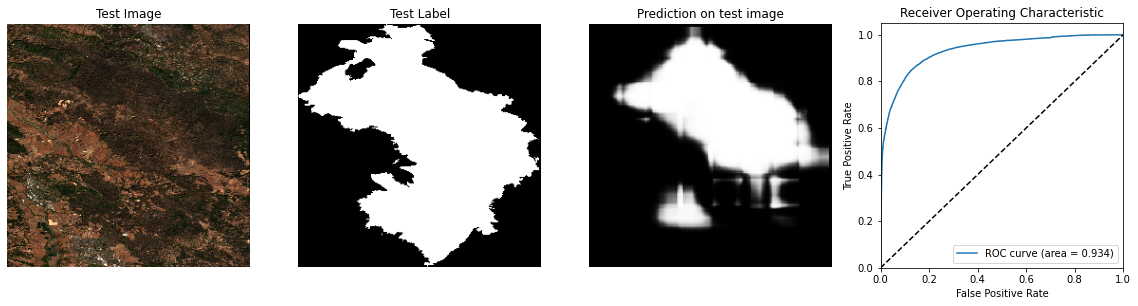

The best threshold is: 0.0011374793


In [ ]:
# Loading the pre-trained model
from sklearn.metrics import roc_curve, auc
model = PSPNet()
model.load_weights('/content/gdrive/MyDrive/Model_save/PSPNet_u.hdf5')

# Random test image index
test_img_number = random.randint(0, len(X_test) - 1)

# Collection of random test image in RGB
test_img = X_test[test_img_number]
test_img_rgb = test_img[:, :, :3]
test_img_rgb = test_img_rgb[:, :, ::-1] * 4

# Collection of random test mask
ground_truth = y_test[test_img_number]
ground_truth = ground_truth[:, :, 0]

# Calculation of the prediction mask
test_img_input = np.expand_dims(test_img, 0)
#prediction = (model.predict(test_img_input) > PREDICTION_THRESHOLD).astype(np.uint8)
prediction = model.predict(test_img_input)

# Data for ROC curve
ground_truth_roc = y_test[test_img_number][:, :, 0].ravel().astype('int16')
prediction_proba = prediction[0, :, :, 0].ravel()

# Calculating the ROC KPI
fpr, tpr, thresholds = roc_curve(ground_truth_roc, prediction_proba)
roc_auc = auc(fpr,tpr)

# Figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4.5))

# Showing the test image
ax1.set_title('Test Image')
ax1.imshow(test_img_rgb)
ax1.axis('off')

# Showing the label image
ax2.set_title('Test Label')
ax2.imshow(ground_truth, cmap='gray')
ax2.axis('off')

# Showing the prediction image
ax3.set_title('Prediction on test image')
ax3.imshow(prediction[0, :, :, 0], cmap='gray')
ax3.axis('off')

# Showing the ROC curve
ax4.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
ax4.plot([0, 1], [0, 1], 'k--')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Receiver Operating Characteristic')
ax4.legend(loc="lower right")

plt.show()

# Best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The best threshold is: ' + str(optimal_threshold))